Projet 5 - Segmentez des clients d'un site e-commerce - Prediction 1
# 1. Initialisation

>>-
## 11. Package imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
#import re
import my
#import math
#import timeit
import time
#from scipy import interpolate
#import geopandas
#import os
#import sys
from IPython.display import clear_output
import warnings

In [2]:
from sklearn import cluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

<div class="alert alert-block alert-danger"><b>ATTENTION !</b> Tous les tests que j'ai effectués avec RobustScaler donnent une classification KMeans défaillante, qui ne tient pas du tout compte des valeurs de F. StandardScaler donne des résultats bien plus cohérents ici.</div>

>>-
## 12. Data imports

In [3]:
df = my.read_csv('dfs_1.csv')
dfrs = my.read_csv('dfs_rs_min.csv')
#dflog = my.read_csv('dfs_log.csv')
dfllll = my.read_csv('dfs_loglogloglog.csv')

Y'avait pas de colonne 'Unnamed: 0'
Y'avait pas de colonne 'Unnamed: 0'
Y'avait pas de colonne 'Unnamed: 0'


>>-
## 13. Initialisation des classifications

In [4]:
def init_classif_in(df=df, cols_num=["R","F","M"], ns=0):
    if "S" in cols_num:
        X = df.rename(columns={"rs": "S"})[cols_num]
    else:
        X = df[cols_num]

    if ns:
#        print(X.shape, sum(X.F == 1))
        pct = (1-sum(X.F == 1)/X.shape[0])*100
        print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat "
              "dans le dataset avant subsampling.".format(a=pct))
        X = X.sample(n=ns, weights=None, random_state=1)
                     #frac=.1, weights="F", random_state=1)
#        print(X.shape, sum(X.F == 1))
        pct = (1-sum(X.F == 1)/X.shape[0])*100
        print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat "
              "dans la subsample sélectionnée.".format(a=pct))

    return X

In [5]:
def init_classif(df=df, cols_num=["R","F","M"], ns=0):
    X = init_classif_in(df, cols_num, ns)
    scaler = StandardScaler()
    X[cols_num] = scaler.fit_transform(X[cols_num])
    return X

>-
# 2. Premiers tests de classification avec DBSCAN

>>-
## 21. Dataset linéaire

In [6]:
X = init_classif(ns=3000)

Il y a 2.9% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 3.0% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.


In [7]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = cluster.DBSCAN(eps=eps, min_samples=mins)
        model = model.fit(X)
        print("eps:", eps,
              ", min_samples:", mins,
              ", # labels:", len(set(model.labels_))
             )

eps: 1.0 , min_samples: 1 , # labels: 16
eps: 1.0 , min_samples: 2 , # labels: 9
eps: 1.0 , min_samples: 3 , # labels: 7
eps: 3.1622776601683795 , min_samples: 1 , # labels: 4
eps: 3.1622776601683795 , min_samples: 2 , # labels: 4
eps: 3.1622776601683795 , min_samples: 3 , # labels: 4
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


(eps=3, min_samples=1) semble convenir.

In [8]:
%%script echo
model = cluster.DBSCAN(eps=3, min_samples=1)
model = model.fit(X)
y_pred = model.predict(X)
set(model.labels_)

Couldn't find program: 'echo'


>>-
## 22. Dataset avec review_score

In [9]:
X = init_classif(df=dfrs, cols_num=["R","F","M","S"], ns=3000)

Il y a 2.8% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.8% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.


In [10]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = cluster.DBSCAN(eps=eps, min_samples=mins)
        model = model.fit(X)
        print("eps:", eps,
              ", min_samples:", mins,
              ", # labels:", len(set(model.labels_))
             )

eps: 1.0 , min_samples: 1 , # labels: 22
eps: 1.0 , min_samples: 2 , # labels: 10
eps: 1.0 , min_samples: 3 , # labels: 6
eps: 3.1622776601683795 , min_samples: 1 , # labels: 5
eps: 3.1622776601683795 , min_samples: 2 , # labels: 4
eps: 3.1622776601683795 , min_samples: 3 , # labels: 4
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


>>-
## 23. Test avec min_samples grand

In [11]:
for eps in np.logspace(0,1,3):
    for mins in [10,30,100,300]:
        model = cluster.DBSCAN(eps=eps, min_samples=mins)
        model = model.fit(X)
        print("eps:", eps,
              ", min_samples:", mins,
              ", # labels:", len(set(model.labels_)))

eps: 1.0 , min_samples: 10 , # labels: 3
eps: 1.0 , min_samples: 30 , # labels: 2
eps: 1.0 , min_samples: 100 , # labels: 2
eps: 1.0 , min_samples: 300 , # labels: 2
eps: 3.1622776601683795 , min_samples: 10 , # labels: 3
eps: 3.1622776601683795 , min_samples: 30 , # labels: 3
eps: 3.1622776601683795 , min_samples: 100 , # labels: 2
eps: 3.1622776601683795 , min_samples: 300 , # labels: 2
eps: 10.0 , min_samples: 10 , # labels: 1
eps: 10.0 , min_samples: 30 , # labels: 1
eps: 10.0 , min_samples: 100 , # labels: 1
eps: 10.0 , min_samples: 300 , # labels: 1


>>-
## 24. Dataset loglogloglog

In [12]:
X = init_classif(df=dfllll, ns=3000)

Il y a 2.9% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 3.0% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.


In [13]:
for eps in np.logspace(0,1,3):
    for mins in [1,2,3]:
        model = cluster.DBSCAN(eps=eps, min_samples=mins)
        model = model.fit(X)
        print("eps:", eps,
              ", min_samples:", mins,
              ", # labels:", len(set(model.labels_))
             )

eps: 1.0 , min_samples: 1 , # labels: 6
eps: 1.0 , min_samples: 2 , # labels: 6
eps: 1.0 , min_samples: 3 , # labels: 4
eps: 3.1622776601683795 , min_samples: 1 , # labels: 2
eps: 3.1622776601683795 , min_samples: 2 , # labels: 2
eps: 3.1622776601683795 , min_samples: 3 , # labels: 2
eps: 10.0 , min_samples: 1 , # labels: 1
eps: 10.0 , min_samples: 2 , # labels: 1
eps: 10.0 , min_samples: 3 , # labels: 1


>>-
## 23. Algo OPTICS

In [14]:
X = init_classif(ns=3000)

Il y a 2.9% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.7% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.


In [15]:
for mins in [.5,1,2,3]:
    model = cluster.OPTICS(min_samples=mins)
    model = model.fit(X)
    print("min_samples:", mins,
          ", # labels:", len(set(model.labels_)))

min_samples: 0.5 , # labels: 1
min_samples: 1 , # labels: 1
min_samples: 2 , # labels: 2921
min_samples: 3 , # labels: 1444


OPTICS avec la cluster_method "xi" ne convient pas.

>-
# 3. Recherche du nombre de clusters idéal pour KMeans

>>-
## 31. Dataset linéaire

Il y a 2.9% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.7% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.
progress: 0.0 % --> 20.0 % --> 40.0 % --> 60.0 % --> 80.0 % --> 100 %


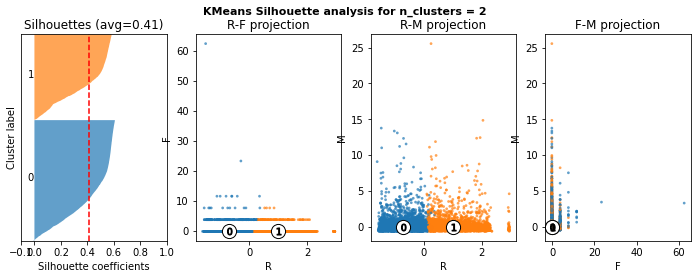

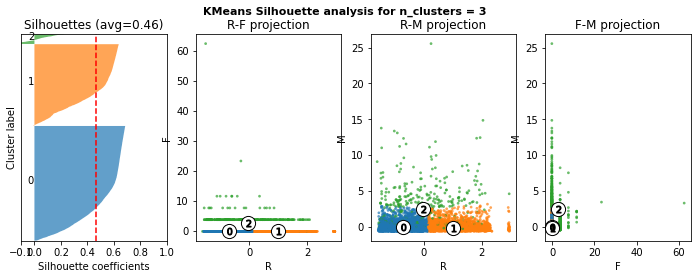

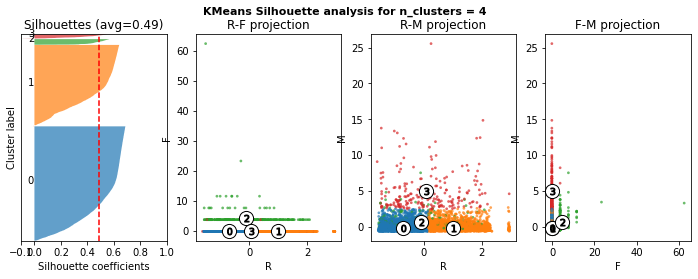

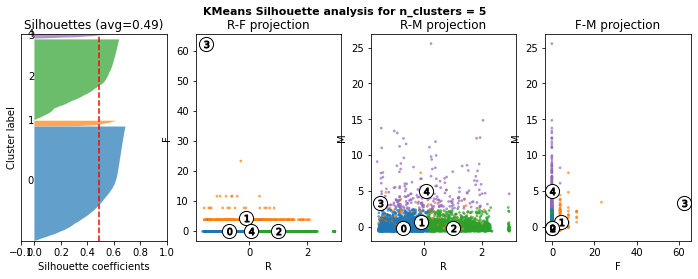

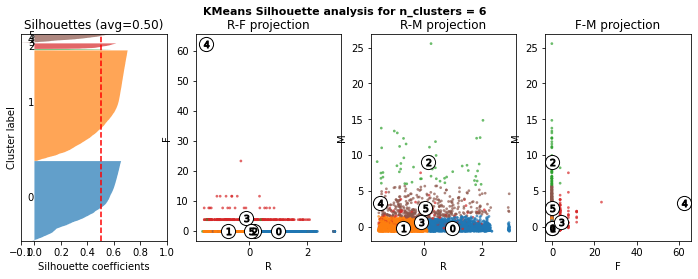

Text(0, 0.5, 'Some des carrés intra-cluster (WCSS)')

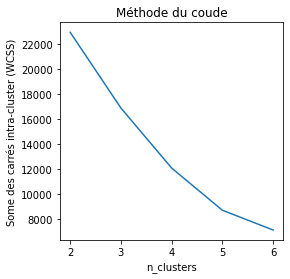

In [17]:
X = init_classif(ns=10000)

wcss = []
range_n_clusters = range(2,7)

print("progress: ", end="")
for loop_step, n_clusters in enumerate(range_n_clusters):
    print(100*loop_step/len(range_n_clusters), "% ", end="--> ")

    y_lower = 10
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_size_inches(12, 3.8)
    ax1.set_xlim([-0.07, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1)*10])
    subp_dic = {
        'RF'   : [ax2, X.R, 0, X.F, 1],
        'RM'   : [ax3, X.R, 0, X.M, 2],
        'FM'   : [ax4, X.F, 1, X.M, 2],
    }

    # We set the seed for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    # Record wcss for the elbow graph.
    wcss.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[
            cluster_labels == i
        ]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            cmap="tab10",
#            cmap=sns.color_palette("bright", n_colors=n_clusters, as_cmap=True),
#            color=sns.color_palette("bright", n_colors=n_clusters),
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouettes (avg={a:1.2f})".format(a=silhouette_avg))
    ax1.set_xlabel("Silhouette coefficients")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    for sd in subp_dic.values():
        sd[0].scatter(
            sd[1],
            sd[3],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=pd.Series(cluster_labels).map(dict(zip(np.unique(cluster_labels),
                                          sns.color_palette(
#                                              "bright",
                                              "tab10",
                                              n_colors=n_clusters,
                                          )))),
            edgecolor="k",
        )

        sd[0].scatter(
            centers[:, sd[2]],
            centers[:, sd[4]],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            sd[0].scatter(
                c[sd[2]],
                c[sd[4]],
                marker="$%d$" % i,
                alpha=1,
                s=50,
                edgecolor="k",
            )

        sd[0].set_title(sd[1].name + "-" + sd[3].name + " projection")
        sd[0].set_xlabel(sd[1].name)
        sd[0].set_ylabel(sd[3].name)

    plt.suptitle(
        "KMeans Silhouette analysis for n_clusters = %d"
        % n_clusters,
        fontsize=11,
        fontweight="bold",
    )

print(100, "%")
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.plot(range_n_clusters, wcss)
plt.title("Méthode du coude")
plt.xlabel("n_clusters")
plt.ylabel("Some des carrés intra-cluster (WCSS)")

La méthode du coude montre un nombre de clusters optimal de 4.  
L'analyse de silhouette donne également un nombre de clusters optimal de 4.  
Les clusters obtenus sont:
- petit F, petit M, R_scaled > 0 (beaucoup de données)
- petit F, petit M, R_scaled < 0 (beaucoup de données)
- grand F, (petit M ?) (peu de données car comportement de clients plus rare)
- (petit F ?), grand M (peu de données car comportement de clients plus rare)
Le 5è cluster vient séparer les deux larges clusters en 3 de petit F et petit M.  
Le 6è cluster vient séparer le petit cluster de grand M en un cluster de grand M
et un cluster de très grand M.  

>>-
## 31. Dataset avec review_score

Il y a 2.8% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.
Il y a 2.8% de clients ayant effectué plus d'un achat dans la subsample sélectionnée.
progress: 0.0 % --> 20.0 % --> 40.0 % --> 60.0 % --> 80.0 % --> 100 %


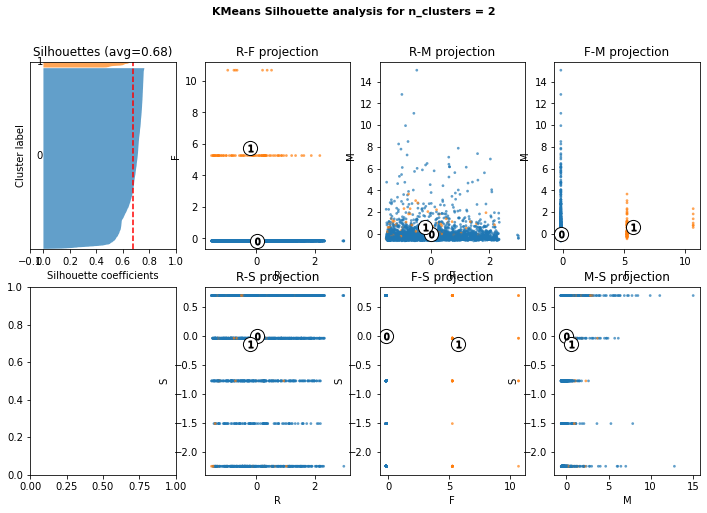

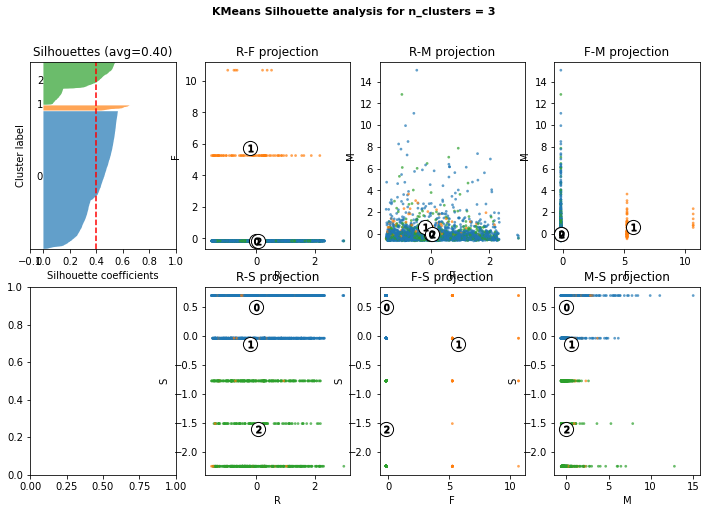

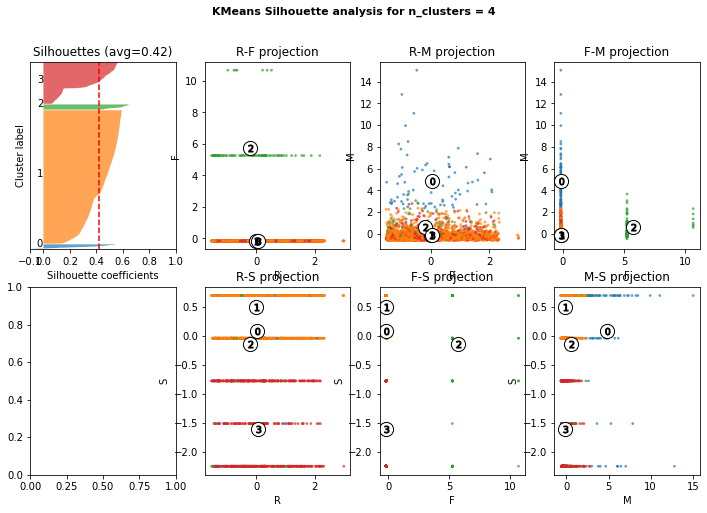

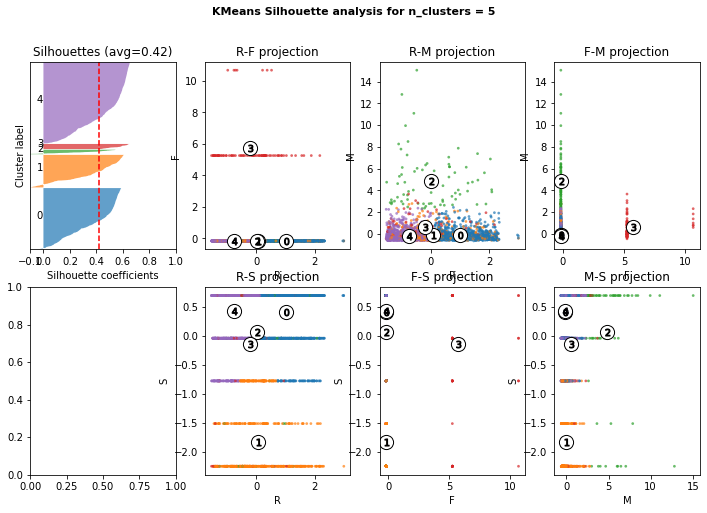

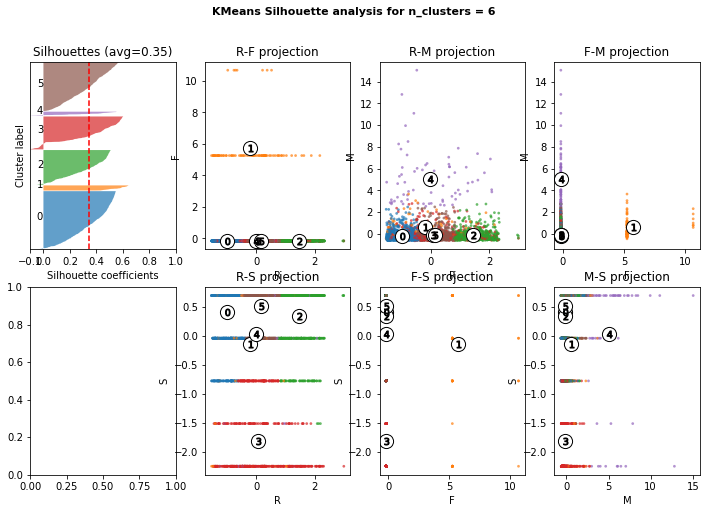

Text(0, 0.5, 'Some des carrés intra-cluster (WCSS)')

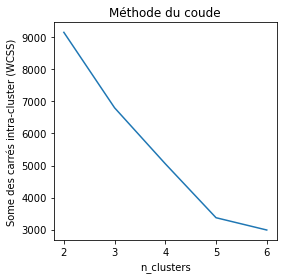

In [18]:
X = init_classif(df=dfrs, cols_num=["R","F","M","S"], ns=3000)

wcss = []
range_n_clusters = range(2,7)

print("progress: ", end="")
for loop_step, n_clusters in enumerate(range_n_clusters):
    print(100*loop_step/len(range_n_clusters), "% ", end="--> ")

    y_lower = 10
    fig, axs = plt.subplots(2, 4)
    fig.set_size_inches(12, 7.6)
    axs[0,0].set_xlim([-0.07, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    axs[0,0].set_ylim([0, len(X) + (n_clusters + 1)*10])
    subp_dic = {
#        "RF"   : [axs[0,1], X.R, 0, X.F, 1, "Recency", "Frequency"],
        "RF"   : [axs[0,1], X.R, 0, X.F, 1],
        "RM"   : [axs[0,2], X.R, 0, X.M, 2],
        "FM"   : [axs[0,3], X.F, 1, X.M, 2],
        "RS"   : [axs[1,1], X.R, 0, X.S, 3],
        "FS"   : [axs[1,2], X.F, 1, X.S, 3],
        "MS"   : [axs[1,3], X.M, 2, X.S, 3],
    }

    # We set the seed for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    # Record wcss for the elbow graph.
    wcss.append(clusterer.inertia_)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[
            cluster_labels == i
        ]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        axs[0,0].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            cmap="tab10",
#            cmap=sns.color_palette("bright", n_colors=n_clusters, as_cmap=True),
#            color=sns.color_palette("bright", n_colors=n_clusters),
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        axs[0,0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    axs[0,0].set_title("Silhouettes (avg={a:1.2f})".format(a=silhouette_avg))
    axs[0,0].set_xlabel("Silhouette coefficients")
    axs[0,0].set_ylabel("Cluster label")
    axs[0,0].set_yticks([])  # Clear the yaxis labels / ticks
    axs[0,0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    axs[0,0].axvline(x=silhouette_avg, color="red", linestyle="--")

    for sd in subp_dic.values():
        sd[0].scatter(
            sd[1],
            sd[3],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=pd.Series(cluster_labels).map(dict(zip(np.unique(cluster_labels),
                                          sns.color_palette(
#                                              "bright",
                                              "tab10",
                                              n_colors=n_clusters,
                                          )))),
            edgecolor="k",
        )

        sd[0].scatter(
            centers[:, sd[2]],
            centers[:, sd[4]],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            sd[0].scatter(
                c[sd[2]],
                c[sd[4]],
                marker="$%d$" % i,
                alpha=1,
                s=50,
                edgecolor="k",
            )

        sd[0].set_title(sd[1].name + "-" + sd[3].name + " projection")
        sd[0].set_xlabel(sd[1].name)
        sd[0].set_ylabel(sd[3].name)

    plt.suptitle(
        "KMeans Silhouette analysis for n_clusters = %d"
        % n_clusters,
        fontsize=11,
        fontweight="bold",
    )

print(100, "%")
plt.show()

fig = plt.figure(figsize=(4, 4))
plt.plot(range_n_clusters, wcss)
plt.title("Méthode du coude")
plt.xlabel("n_clusters")
plt.ylabel("Some des carrés intra-cluster (WCSS)")

>-
# 4. Stabilité du KMeans à 5 clusters avec review_score

In [19]:
scaler = StandardScaler()
cols_num=["R","F","M","S"]
X = init_classif_in(df=dfrs, cols_num=cols_num)
Xns = X.copy()
X[cols_num] = scaler.fit_transform(X[cols_num])

In [20]:
ls_y_pred = []
for i in range(5):
    model = cluster.KMeans(n_clusters=5, init="random")
    y_pred = model.fit_predict(X)
    ls_y_pred.append(y_pred)
    Xns["label"] = pd.Series(y_pred)
#    print(Xns.groupby("label").R.count())
#    print(Xns.groupby("label").mean())
#    print(Xns.groupby("label").std())
print(Xns.groupby("label").R.count())
print(Xns.groupby("label").mean())

label
0     2662
1    42128
2    31761
3     2041
4    16787
Name: R, dtype: int64
                  R         F            M         S
label                                               
0      2.285980e+07  2.114200   308.853573  3.723892
1      1.479985e+07  1.000000   133.670017  4.668581
2      3.822608e+07  1.000000   134.910418  4.631561
3      2.480048e+07  1.019598  1283.273092  3.948555
4      2.529207e+07  1.000000   153.343989  1.588849


Le KMeans trouve les clusters suivants:
- S bas (1.6/5), RFM moyens. -> client déçu. -> Excuses et bon d'achat.
- S haut, achat récent, FM moyens. -> nouveau client -> pas d'action.
- S haut, achat daté, FM moyens. -> client satisfait mais perdu -> news/discount.
- M haut, RFS moyens. -> un seul gros achat -> news.
- F haut, RMS moyens. -> client fréquent -> proposition d'abonnement VIP.

In [21]:
from sklearn.metrics import adjusted_rand_score

In [22]:
ARIs = []
for i, j in enumerate(ls_y_pred):
    for m, n in enumerate(ls_y_pred):
        ARIi = adjusted_rand_score(j, n)
#        print(ARIi)
        ARIs.append(ARIi)
print(pd.Series(ARIs).mean(), pd.Series(ARIs).std())

0.9997356199759814 0.00026026768573110656


Excellent résultat ! Le KMeans à 5 clusters trouve toujours les mêmes clusters
malgré le init="random".

C:\Users\achou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='M'>

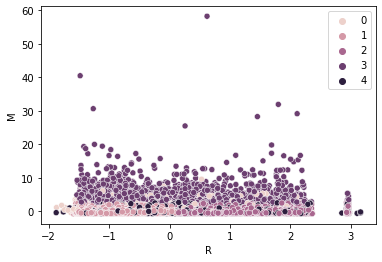

In [23]:
sns.scatterplot(X.R, X.M, y_pred)

>-
# 5. Comparaison d'algorithmes

progress:  100.0 % 

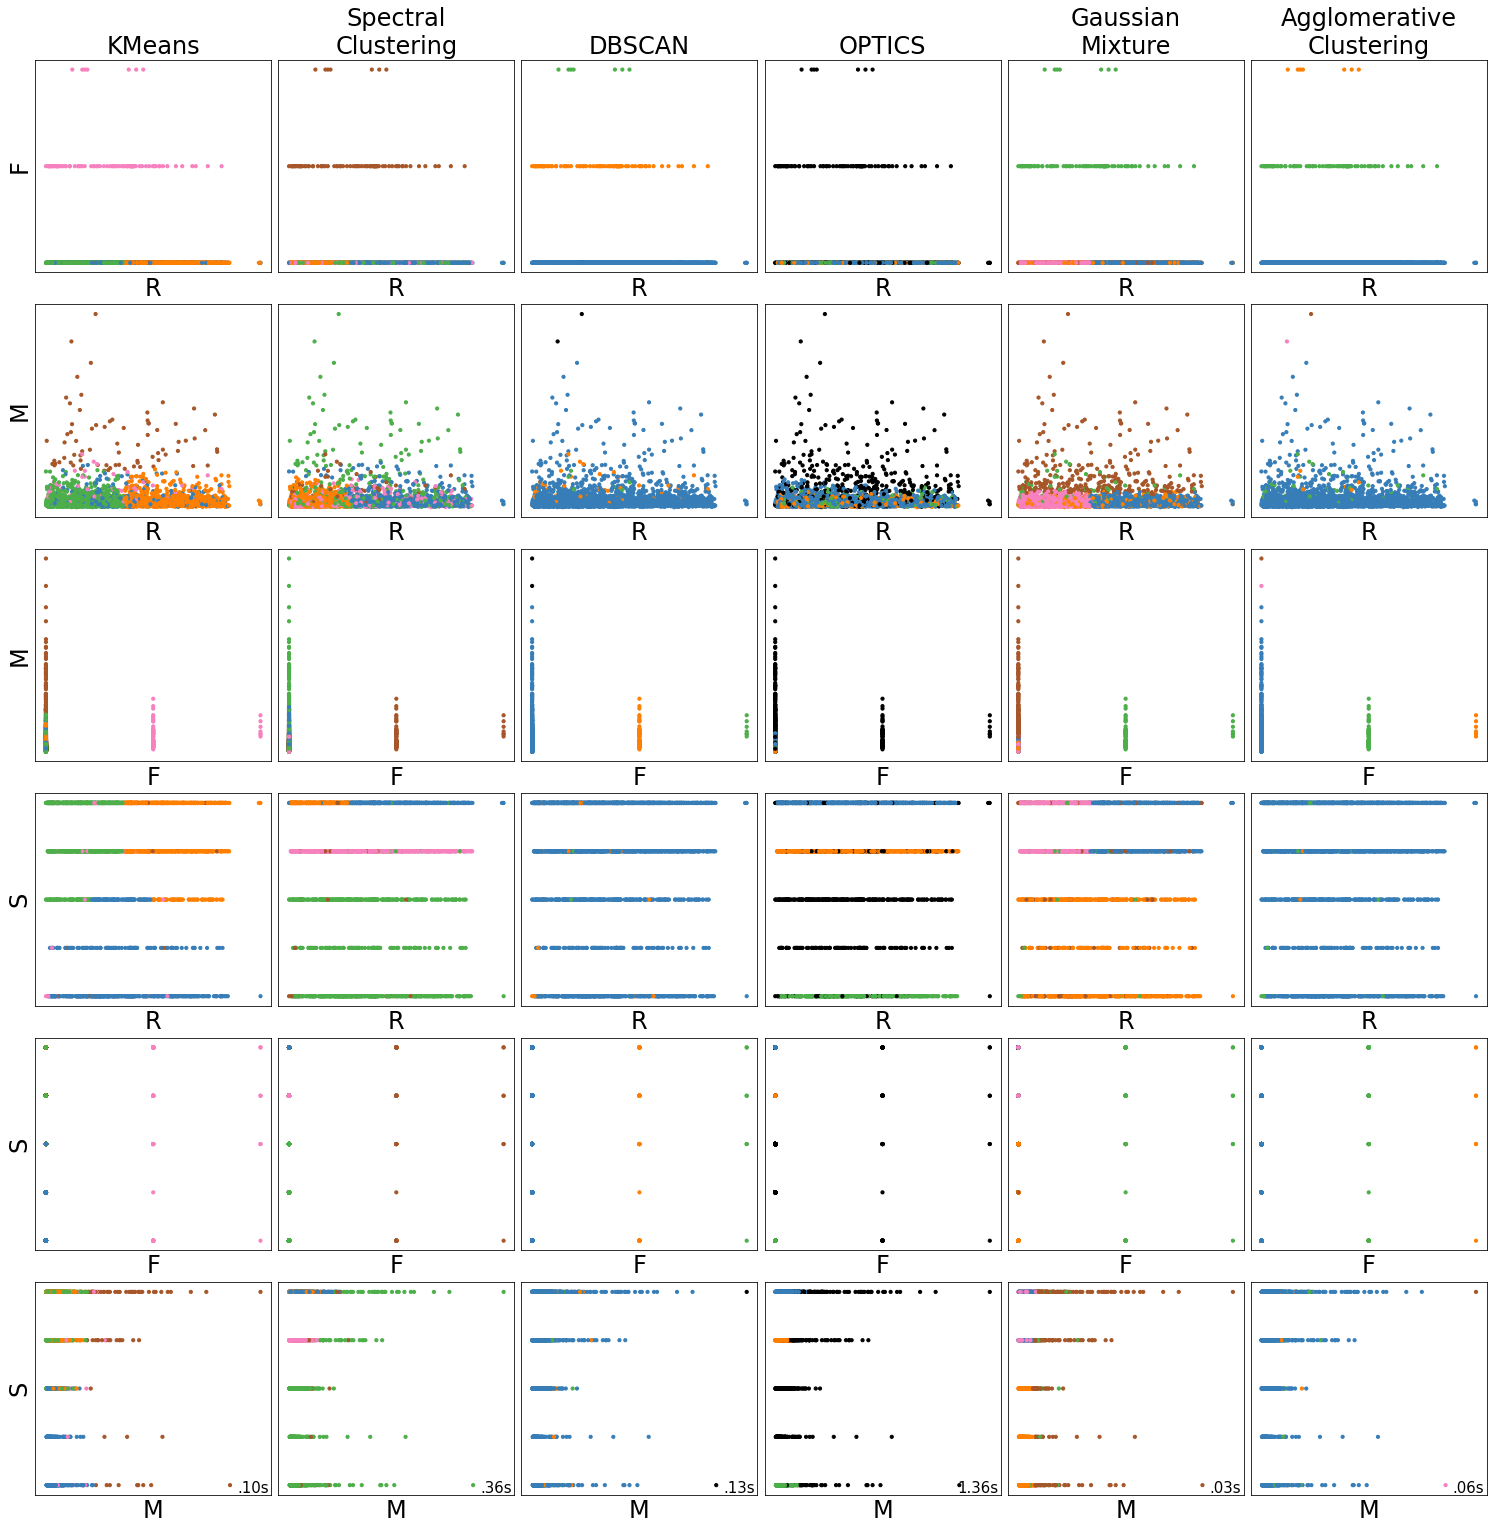

In [24]:
from itertools import cycle, islice
from sklearn.neighbors import kneighbors_graph

X = init_classif(df=dfrs, cols_num=["R","F","M","S"], ns=3000)

plt.figure(figsize=(21, 21))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.03, hspace=0.15
)
np.random.seed(0)

params = {
    "damping": 0.9, # .75, .9
    "eps": 3, # .2, 3
    "n_clusters": 5,
    "n_neighbors": 3, # 2, 3
    "min_cluster_size": 0.1, # .1, .2
    "min_samples": 7,
    "preference": -200, # -240, -200
    "quantile": 0.3, # .2, .3
    "xi": 0.05, # .01, .1
}

subp_dic = {
    "RF"   : [X.R, 0, X.F, 1],
    "RM"   : [X.R, 0, X.M, 2],
    "FM"   : [X.F, 1, X.M, 2],
    "RS"   : [X.R, 0, X.S, 3],
    "FS"   : [X.F, 1, X.S, 3],
    "MS"   : [X.M, 2, X.S, 3],
}

k_means = cluster.KMeans(n_clusters=params.get("n_clusters"))
spectral = cluster.SpectralClustering(
    n_clusters=params.get("n_clusters"),
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
dbscan = cluster.DBSCAN(eps=params.get("eps"))
optics = cluster.OPTICS(
    min_samples=params.get("min_samples"),
    xi=params.get("xi"),
    min_cluster_size=params.get("min_cluster_size"),
)
gmm = GaussianMixture(
    n_components=params.get("n_clusters"), covariance_type="full"
)
connectivity = kneighbors_graph(
    X, n_neighbors=params["n_neighbors"], include_self=False
)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average",
    affinity="cityblock",
    n_clusters=params.get("n_clusters"),
    connectivity=connectivity,
)

clustering_algorithms = (
    ("KMeans", k_means),
    ("Spectral\nClustering", spectral),
    ("DBSCAN", dbscan),
    ("OPTICS", optics),
    ("Gaussian\nMixture", gmm),
    ("Agglomerative\nClustering", average_linkage),
)

for i_algo, (name, algorithm) in enumerate(clustering_algorithms):
    t0 = time.time()
    algorithm.fit(X)
    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
    t2 = time.time()

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                # On re-crée colors pour chaque algo car le nombre de clusters
                # diffère.
                int(max(y_pred) + 1),
            )
        )
    )
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    for i_proj, sd in enumerate(subp_dic.values()):
        clear_output()
        print("progress: ",
              100*(1+i_proj+i_algo*len(clustering_algorithms))\
              /len(subp_dic)/len(clustering_algorithms),
              "% ", end="")

        plt.subplot(len(clustering_algorithms),
                    len(subp_dic),
                    1+i_algo+len(clustering_algorithms)*i_proj)

        plt.scatter(sd[0], sd[2], s=10, color=colors[y_pred])

        if i_proj == 0:
            plt.title(name, size=24)
        plt.xlabel(sd[0].name, size=24)
        if i_algo == 0:
            plt.ylabel(sd[2].name, size=24)
#        plt.xlim(-2.5, 2.5)
#        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
#        if i_proj == len(subp_dic)-2:
#            plt.text(
#                0.99,
#                0.01,
#                ("%.2fs" % (t1 - t0)).lstrip("0"),
#                transform=plt.gca().transAxes,
#                size=15,
#                horizontalalignment="right",
#            )
        if i_proj == len(subp_dic)-1:
            plt.text(
                0.99,
                0.01,
                ("%.2fs" % (t2 - t0)).lstrip("0"),
                transform=plt.gca().transAxes,
                size=15,
                horizontalalignment="right",
            )

plt.show()

In [25]:
#from scipy.cluster.hierarchy import dendrogram
